In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go

# Loading Dataset

In [2]:
df = pd.read_csv("/content/job_recommendation_dataset.csv")

# Job Recommendation Dataset Analysis

# Dataset Overview

In [5]:
print("## Dataset Overview")
print("### First Five Rows")
print(df.head())

## Dataset Overview
### First Five Rows
                         Job Title                      Company  \
0              Early years teacher               Richardson Ltd   
1         Counselling psychologist  Ramos, Santiago and Stewart   
2        Radio broadcast assistant                 Franco Group   
3     Designer, exhibition/display                  Collins Inc   
4  Psychotherapist, dance movement                 Barker Group   

        Location Experience Level    Salary    Industry  \
0         Sydney     Senior Level   87000.0  Healthcare   
1  San Francisco        Mid Level   50000.0   Marketing   
2       New York        Mid Level   77000.0  Healthcare   
3         Berlin     Senior Level   90000.0    Software   
4         Sydney      Entry Level  112000.0  Healthcare   

                                     Required Skills  
0                                    Pharmaceuticals  
1                   Google Ads, SEO, Content Writing  
2  Patient Care, Nursing, Medical Res

In [6]:
print("### Dataset Info")
print(df.info())
print("### Summary Statistics")
print(df.describe())

### Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         50000 non-null  object 
 1   Company           50000 non-null  object 
 2   Location          50000 non-null  object 
 3   Experience Level  50000 non-null  object 
 4   Salary            50000 non-null  float64
 5   Industry          50000 non-null  object 
 6   Required Skills   50000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB
None
### Summary Statistics
              Salary
count   50000.000000
mean    95145.100000
std     31782.635648
min     40000.000000
25%     68000.000000
50%     95000.000000
75%    123000.000000
max    150000.000000


# Missing Values

In [7]:
print("## Missing Values Analysis")
print(df.isnull().sum())

## Missing Values Analysis
Job Title           0
Company             0
Location            0
Experience Level    0
Salary              0
Industry            0
Required Skills     0
dtype: int64


# Salary Distribution

## Salary Distribution


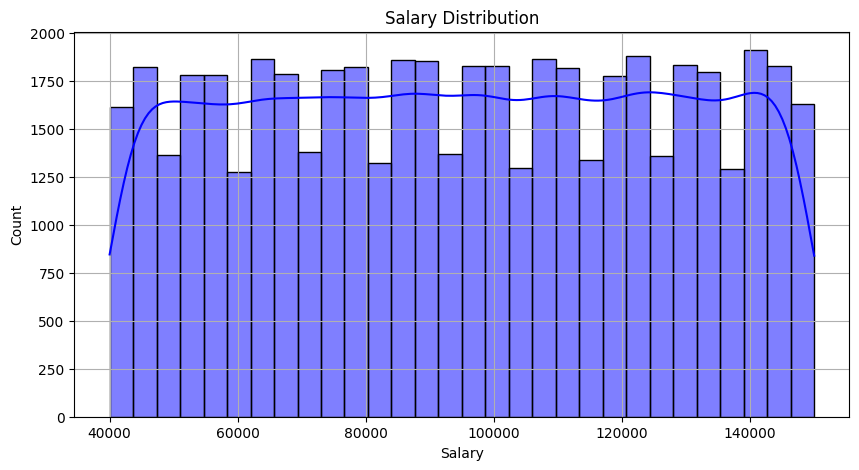

In [8]:
print("## Salary Distribution")
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'], bins=30, kde=True, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Experience Level Count

## Experience Level Distribution


<ipython-input-9-78f9fb97f4ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Experience Level'], palette='coolwarm')


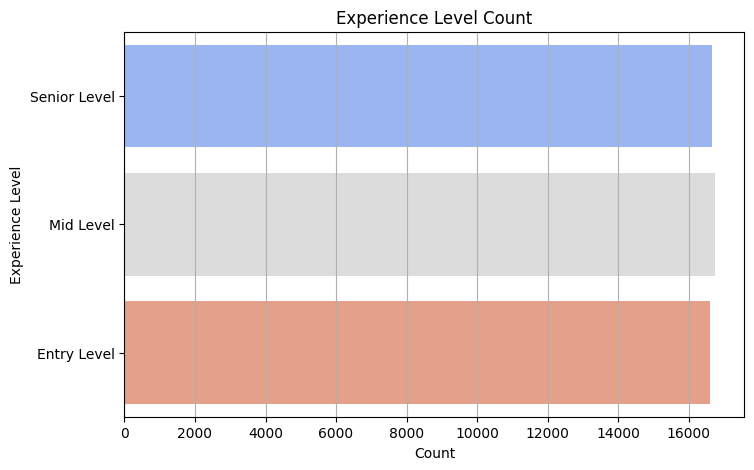

In [9]:
print("## Experience Level Distribution")
plt.figure(figsize=(8,5))
sns.countplot(y=df['Experience Level'], palette='coolwarm')
plt.title("Experience Level Count")
plt.xlabel("Count")
plt.ylabel("Experience Level")
plt.grid(axis='x')
plt.show()

# Industry Distribution

## Industry Distribution


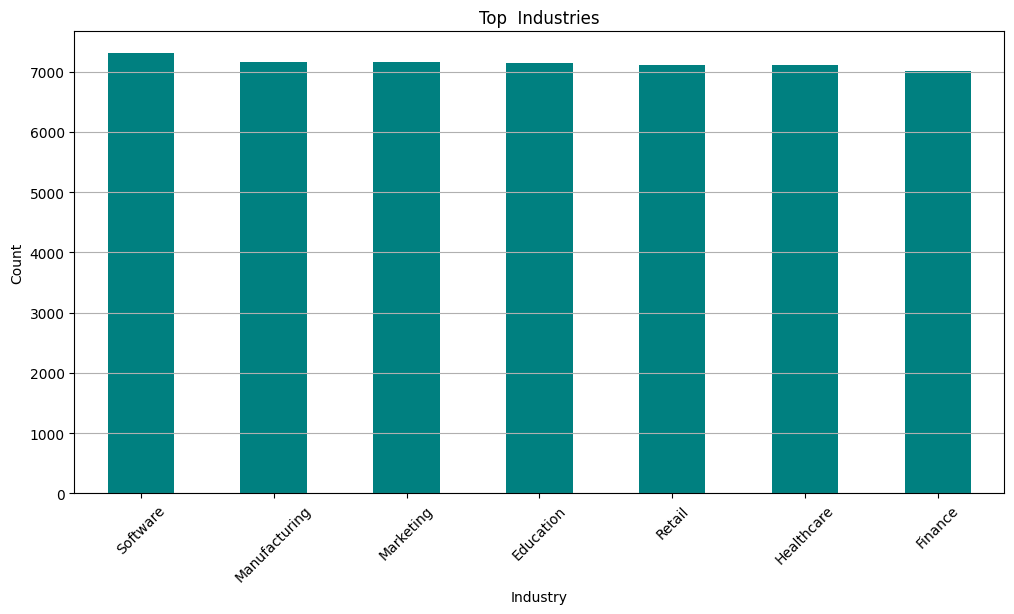

In [11]:
print("## Industry Distribution")
plt.figure(figsize=(12,6))
df['Industry'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top  Industries")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Location Analysis

## Top Job Locations


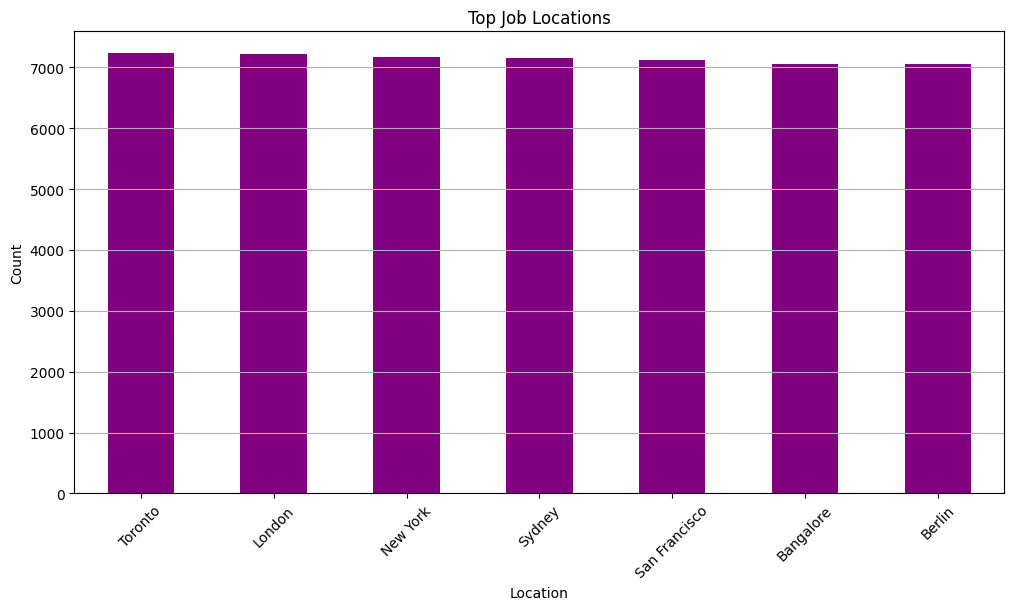

In [13]:
print("## Top Job Locations")
plt.figure(figsize=(12,6))
df['Location'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top Job Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# WordCloud for Job Titles

## Most Common Job Titles


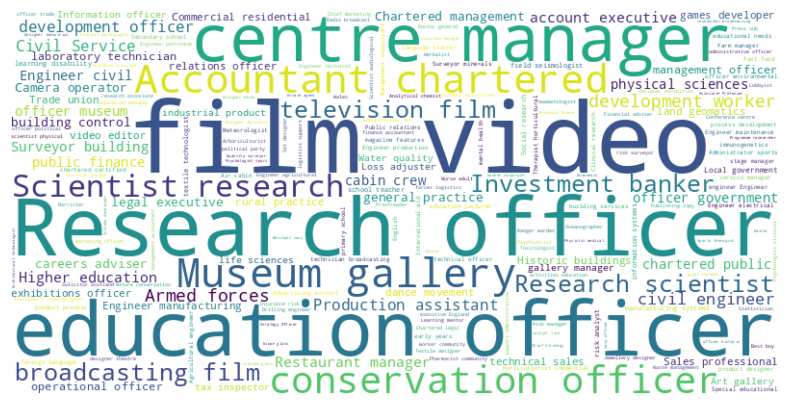

In [14]:
print("## Most Common Job Titles")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Job Title']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Required Skills Analysis

## Most In-Demand Skills


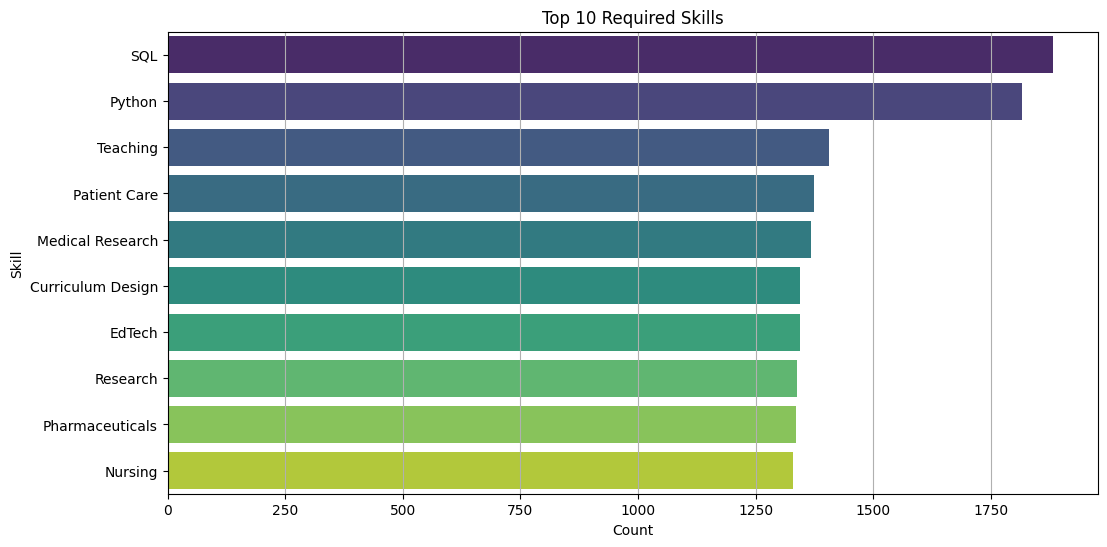

In [16]:
import warnings
warnings.filterwarnings('ignore')
print("## Most In-Demand Skills")
skills = ' '.join(df['Required Skills']).split(', ')
skill_counts = Counter(skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=skill_df['Skill'].head(10), x=skill_df['Count'].head(10), palette='viridis')
plt.title("Top 10 Required Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.grid(axis='x')
plt.show()

# Salary by Experience Level

## Salary by Experience Level


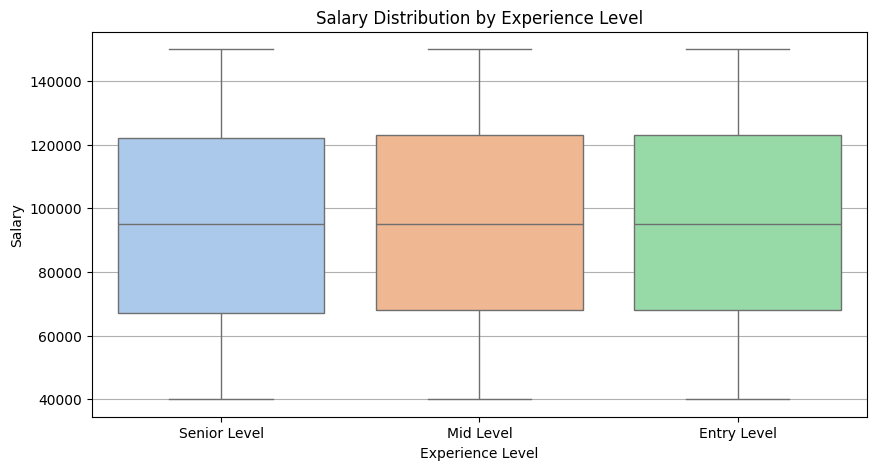

In [17]:
print("## Salary by Experience Level")
plt.figure(figsize=(10,5))
sns.boxplot(x='Experience Level', y='Salary', data=df, palette='pastel')
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.grid(axis='y')
plt.show()

# Salary by Industry

## Salary Distribution Across Industries


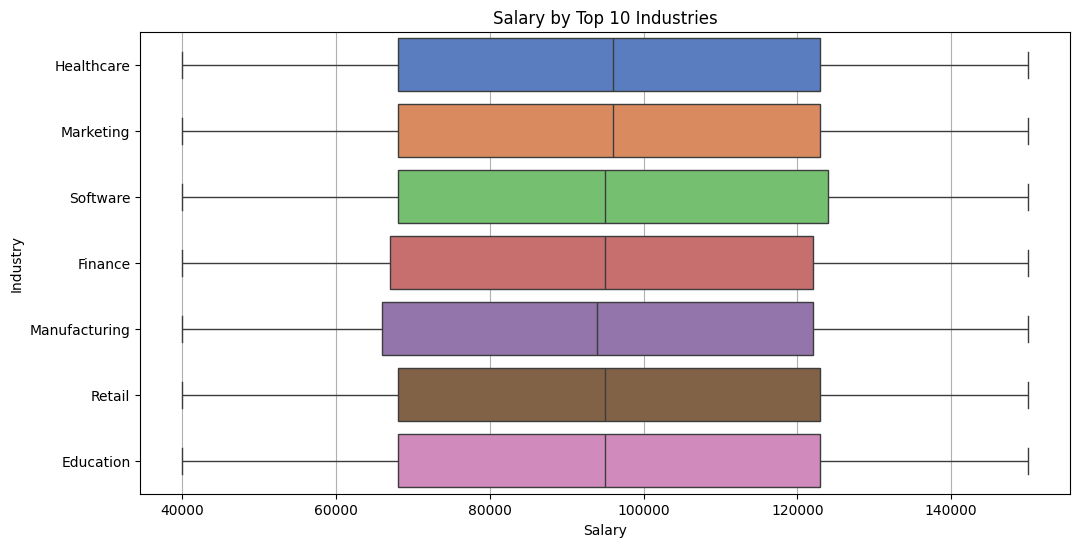

In [18]:
print("## Salary Distribution Across Industries")
plt.figure(figsize=(12,6))
sns.boxplot(x='Salary', y='Industry', data=df[df['Industry'].isin(df['Industry'].value_counts().head(10).index)], palette='muted')
plt.title("Salary by Top 10 Industries")
plt.xlabel("Salary")
plt.ylabel("Industry")
plt.grid(axis='x')
plt.show()

# Interactive Plot for Salary Distribution

In [19]:
print("## Interactive Salary Visualization")
fig = px.box(df, x='Industry', y='Salary', color='Experience Level', title="Salary Distribution by Industry & Experience Level")
fig.show()

## Interactive Salary Visualization


# Pie Chart for Experience Level

In [20]:
print("## Experience Level Proportion")
exp_counts = df['Experience Level'].value_counts()
fig_pie = go.Figure(data=[go.Pie(labels=exp_counts.index, values=exp_counts.values, hole=0.3)])
fig_pie.update_layout(title_text="Experience Level Distribution")
fig_pie.show()

## Experience Level Proportion


# Correlation Heatmap

## Salary by Top Locations


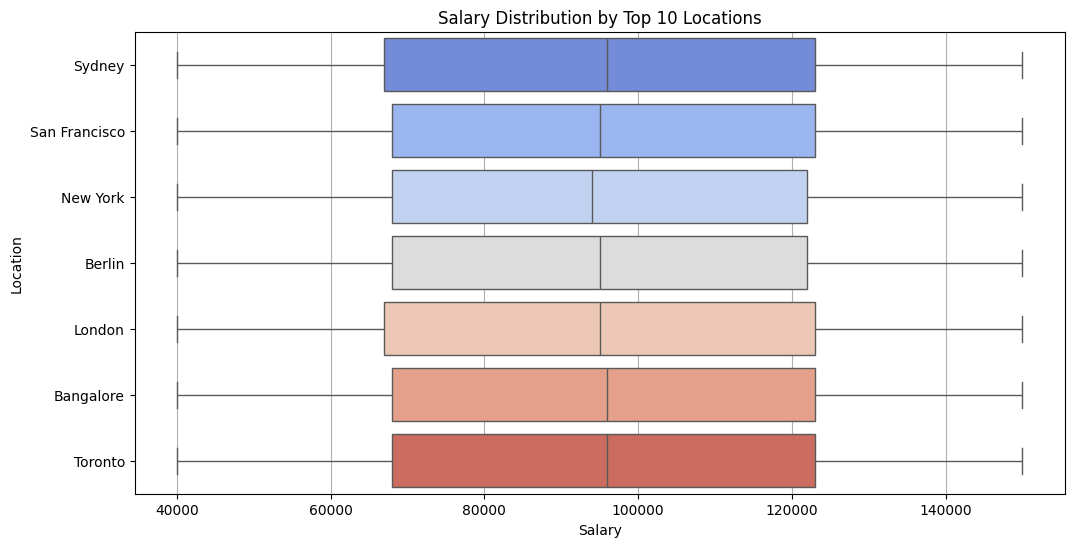

In [22]:
print("## Salary by Top Locations")
top_locations = df['Location'].value_counts().head(10).index
df_top_locs = df[df['Location'].isin(top_locations)]
plt.figure(figsize=(12,6))
sns.boxplot(x='Salary', y='Location', data=df_top_locs, palette='coolwarm')
plt.title("Salary Distribution by Top 10 Locations")
plt.xlabel("Salary")
plt.ylabel("Location")
plt.grid(axis='x')
plt.show()

# Job Title Analysis

## Job Title Frequency


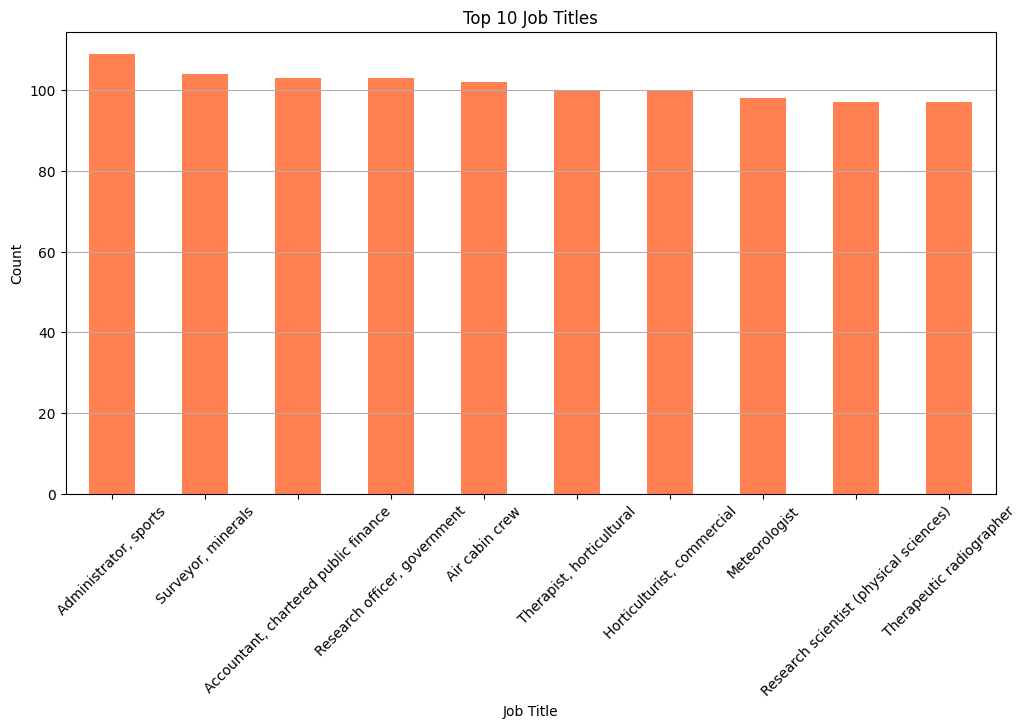

In [23]:
print("## Job Title Frequency")
plt.figure(figsize=(12,6))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Salary vs. Experience Level (Scatter Plot)

## Salary vs Experience Level


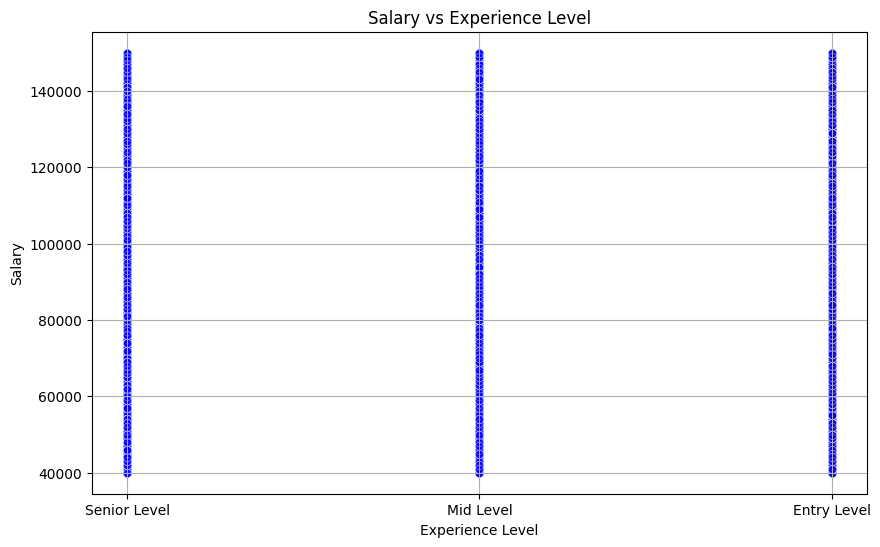

In [24]:
print("## Salary vs Experience Level")
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Experience Level'], y=df['Salary'], alpha=0.5, color='blue')
plt.title("Salary vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.grid()
plt.show()

# Industry-wise Experience Level Distribution

## Industry-wise Experience Level Distribution


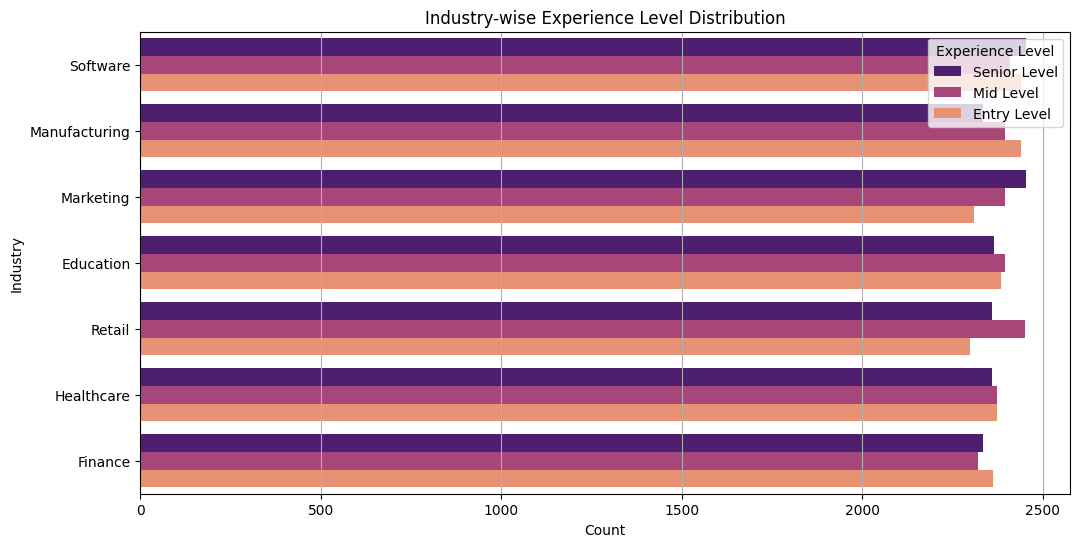

In [25]:
print("## Industry-wise Experience Level Distribution")
plt.figure(figsize=(12,6))
sns.countplot(y=df['Industry'], hue=df['Experience Level'], order=df['Industry'].value_counts().index[:10], palette='magma')
plt.title("Industry-wise Experience Level Distribution")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.legend(title="Experience Level")
plt.grid(axis='x')
plt.show()